In [427]:
import numpy as np
import pandas as pd
import seaborn as sns
import glob, os
import matplotlib.pyplot as plt

In [468]:

file_lists = {}

file_lists['random_search_syne_tune'] = glob.glob('C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/results/*/random_search_syne_tune/*.csv') # * means all if need specific format then *.csv
file_lists['grid_search_syne_tune'] = glob.glob('C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/results/*/grid_search_syne_tune/*.csv') # * means all if need specific format then *.csv
file_lists['hyperband_syne_tune'] = glob.glob('C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/results/*/hyperband_syne_tune/*.csv') # * means all if need specific format then *.csv
file_lists['asha_syne_tune'] = glob.glob('C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/results/*/asha_syne_tune/*.csv') # * means all if need specific format then *.csv
#file_lists['bayesian_syne_tune'] = glob.glob('C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/results/*/bayesian_syne_tune/*.csv') # * means all if need specific format then *.csv
file_lists['bayesian_open_box'] = glob.glob('C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/results/*/bayesian_open_box/*.csv') # * means all if need specific format then *.csv
file_lists['transfer_open_box'] = glob.glob('C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/results/*/transfer_open_box/*.csv') # * means all if need specific format then *.csv



In [470]:
all_data = {'random_search_syne_tune' : [],
           'grid_search_syne_tune' : [],
           'hyperband_syne_tune' : [],
           'asha_syne_tune' : [],
           #'bayesian_syne_tune' : [],
           'bayesian_open_box' : [],
           'transfer_open_box' : []
           }


for algorithm, file_list in file_lists.items() :
    for file in file_list : 
        df = pd.read_csv(file)
        df = df[df['transfer_id'] > 0] 
        df = df.replace('nan', np.nan)
        df = df.dropna().reset_index()
        #print(df['time'])
        all_data[algorithm].append(df)

In [472]:



all_best_times= {'random_search_syne_tune' : [],
           'grid_search_syne_tune' : [],
           'hyperband_syne_tune' : [],
           'asha_syne_tune' : [],
           #'bayesian_syne_tune' : [],
           'bayesian_open_box' : [],
           'transfer_open_box' : []
                }

for algorithm,df_list in all_data.items():
    concatenated_df;
    list = []
    for df in df_list:
        #print(df.head())
        
        df_best_time = pd.DataFrame({'best_time_so_far': df['time'].cummin()})

        #concatenated_df = pd.concat([concatenated_df,df_best_time], axis=1, ignore_index=True)
        #concatenated_df.append(df_best_time, axis=1, ignore_index=True)
        list.append(df_best_time)
        
    all_best_times[algorithm] = pd.concat(list, axis=1, ignore_index=True)
 
#print(all_best_times)


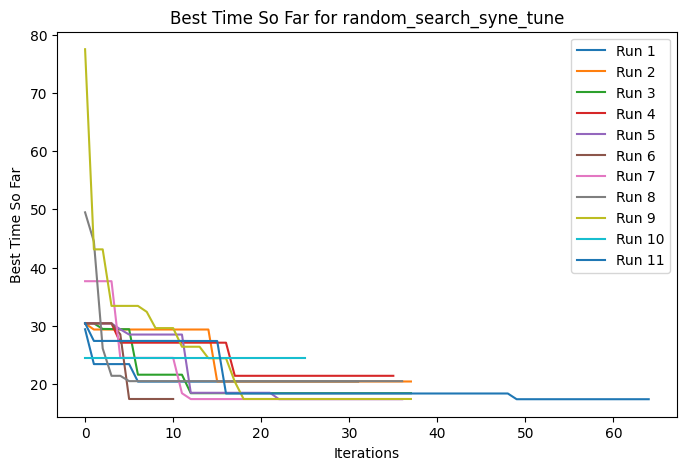

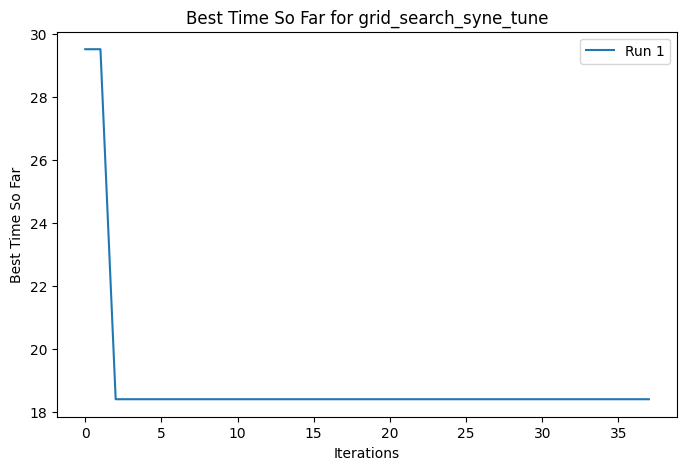

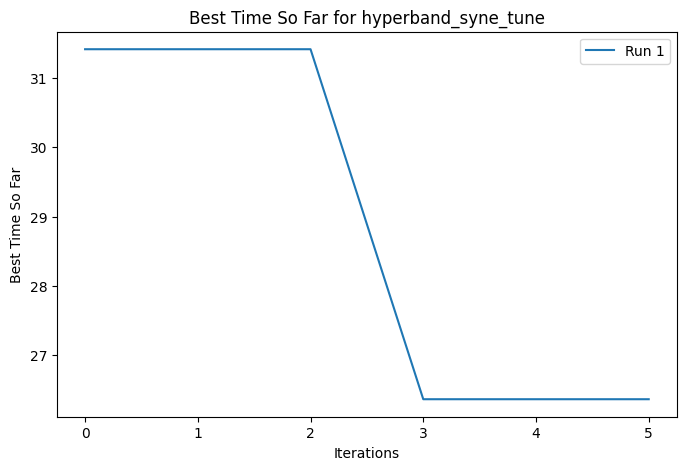

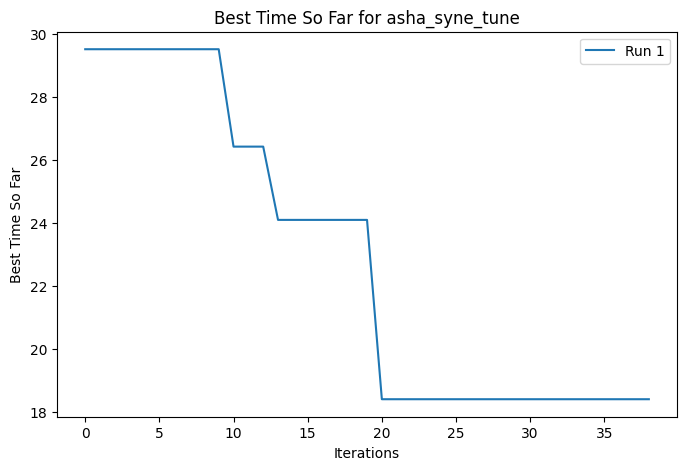

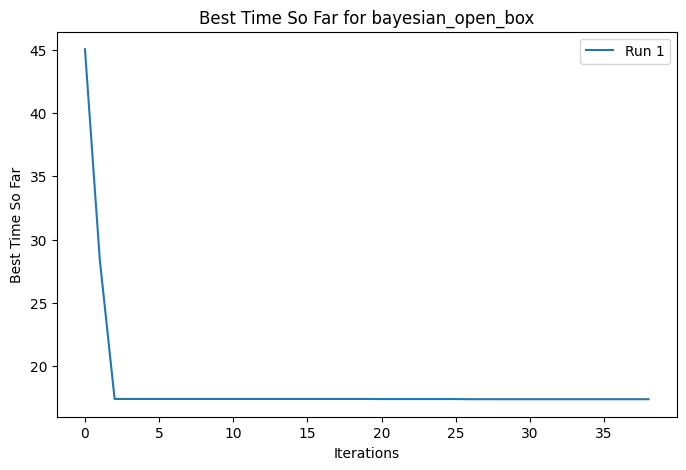

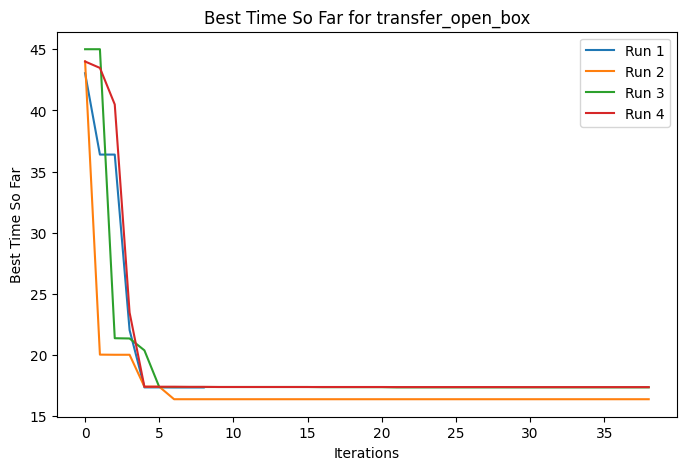

In [474]:
for algorithm, df in all_best_times.items():
    plt.figure(figsize=(8, 5))
    
    # Plot each column as a separate run
    for col in df.columns:
        plt.plot(df[col], label=f'Run {col+1}')
    
    plt.xlabel('Iterations')
    plt.ylabel('Best Time So Far')
    plt.title(f'Best Time So Far for {algorithm}')
    plt.legend()
    plt.show()

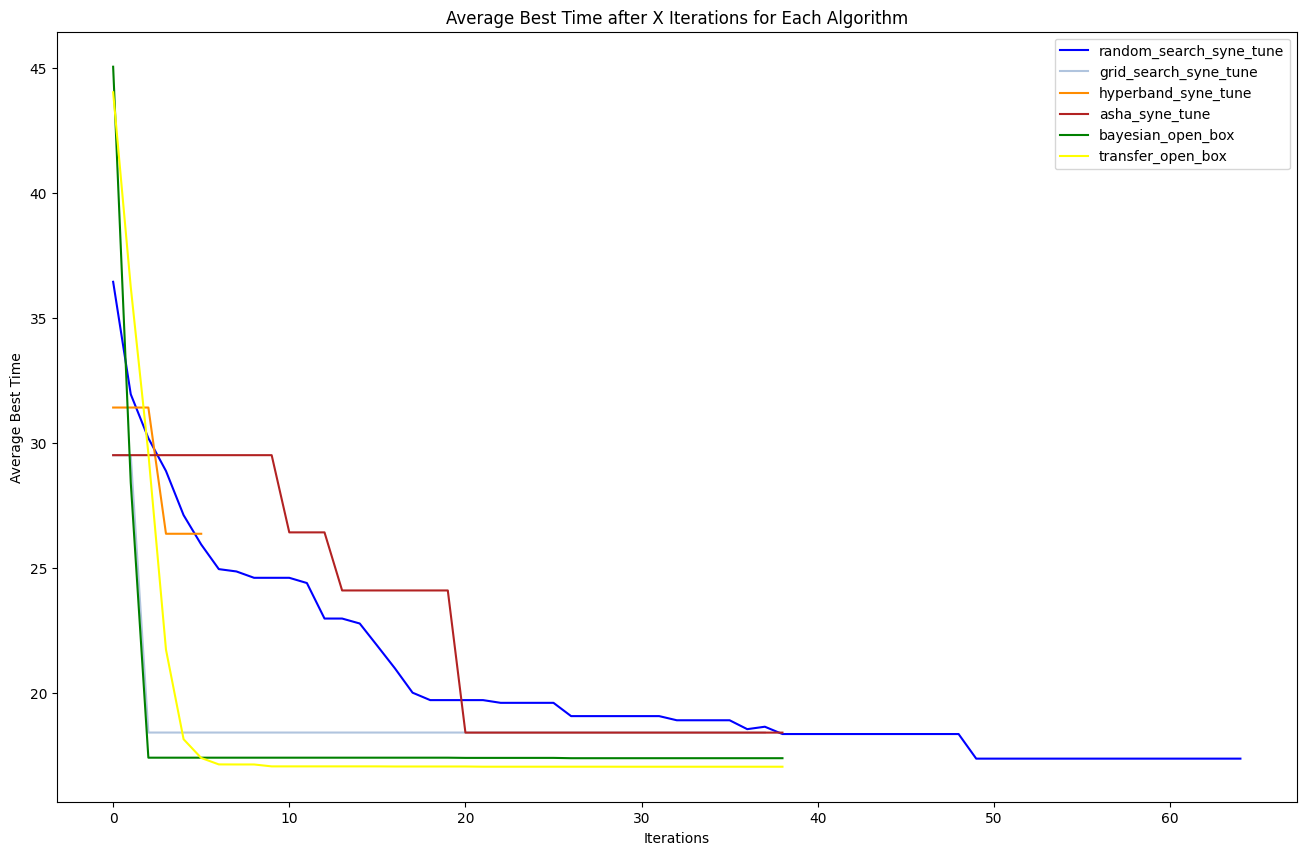

In [476]:
plt.figure(figsize=(16, 10))

for algorithm, df in all_best_times.items():
    # Calculate the average across columns for each row
    avg_best_time = df.mean(axis=1, skipna=True)

    colors = {
            'random_search_syne_tune' : 'blue',
           'grid_search_syne_tune' : 'lightsteelblue',
           'hyperband_syne_tune' : 'darkorange',
           'asha_syne_tune' : 'firebrick',
           'bayesian_syne_tune' : 'red',
        'bayesian_open_box' : 'green',
           'transfer_open_box' : 'yellow'
}
    
    # Plot the average line
    plt.plot(avg_best_time, label=f'{algorithm}', color=colors.get(algorithm, 'black'))
    
plt.xlabel('Iterations')
plt.ylabel('Average Best Time')
plt.title('Average Best Time after X Iterations for Each Algorithm')
plt.legend()
plt.show()

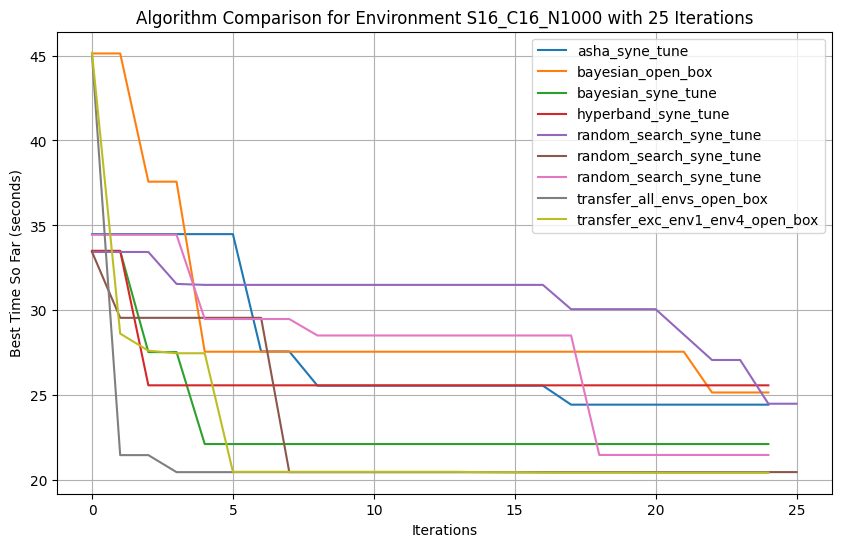

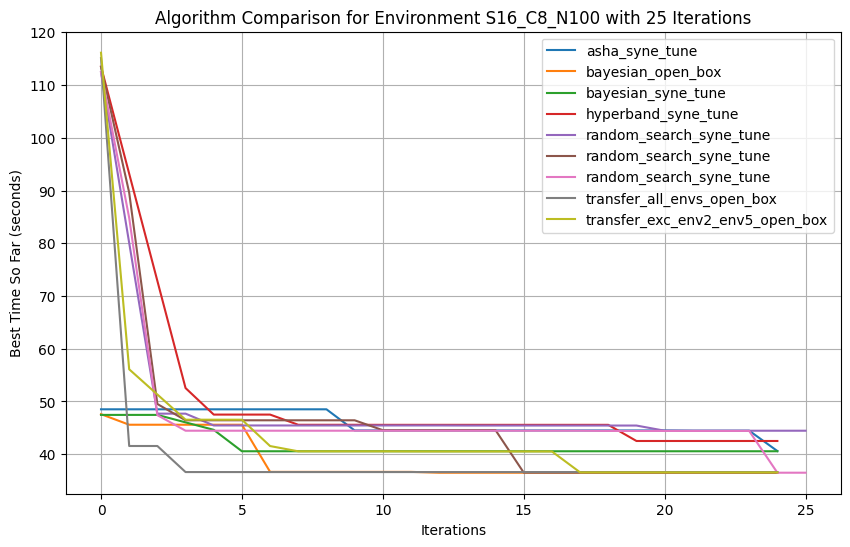

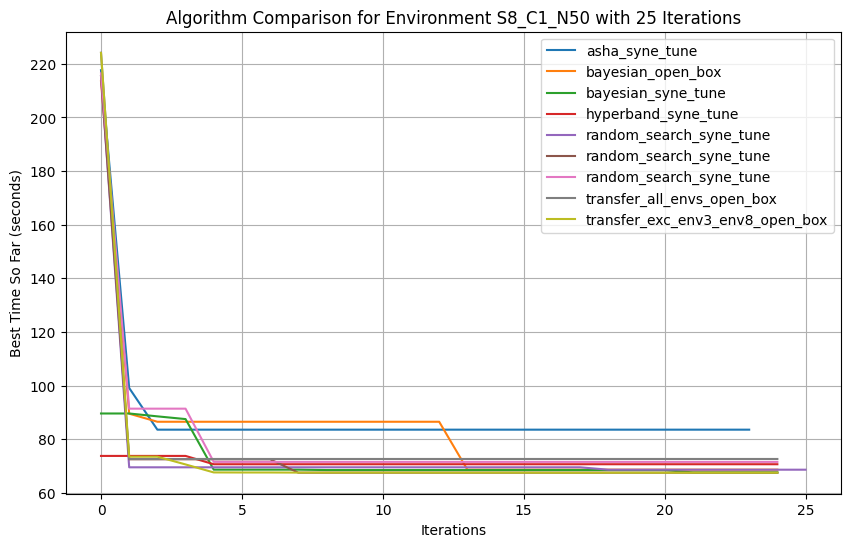

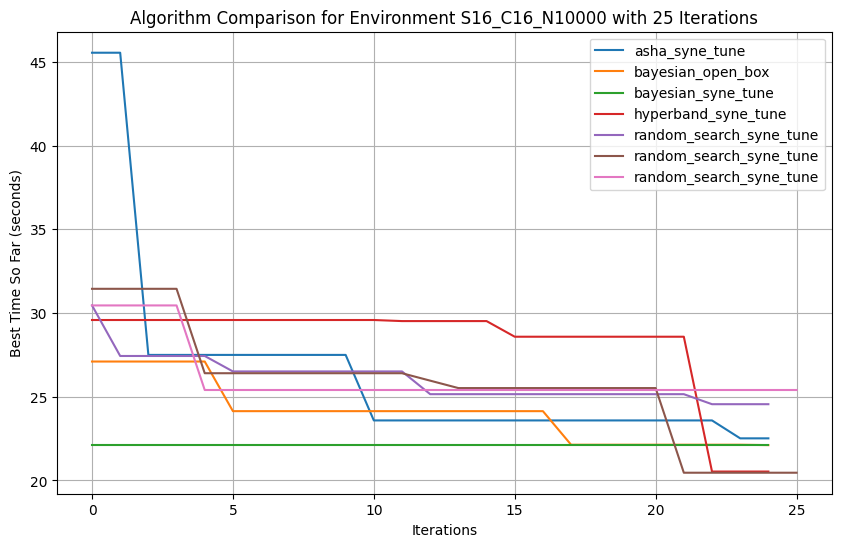

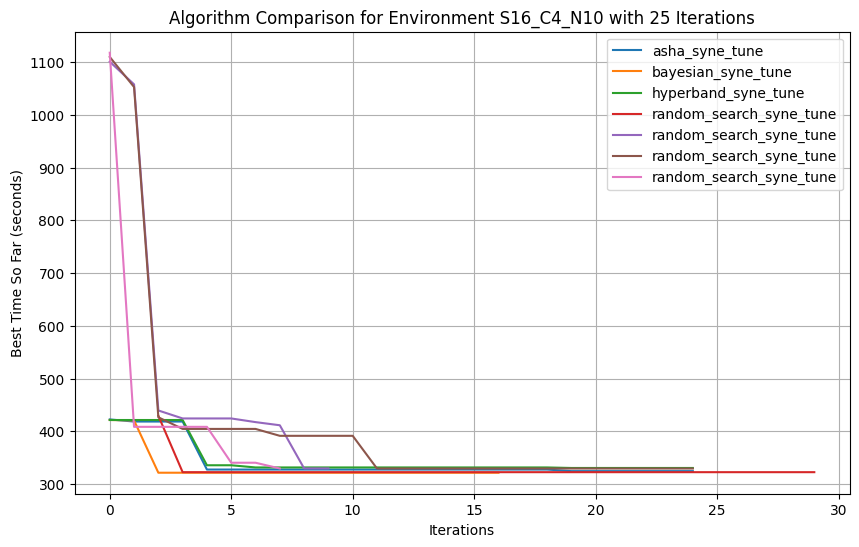

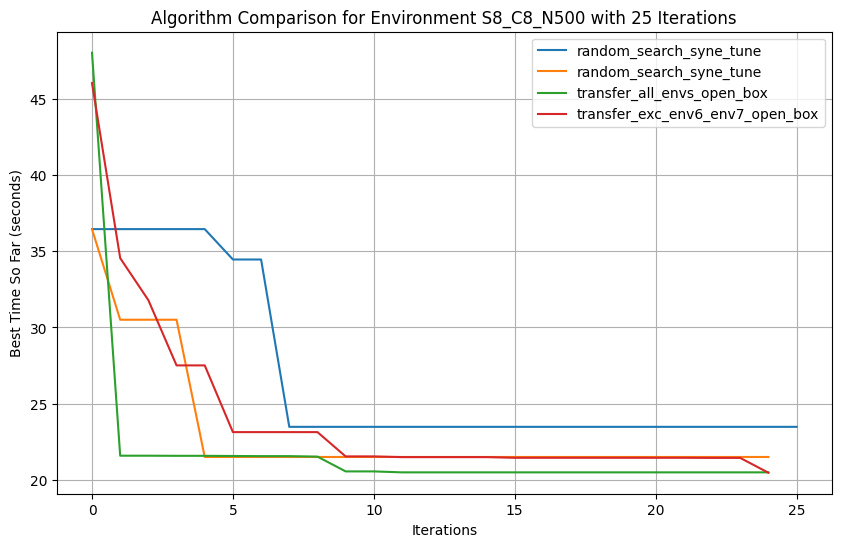

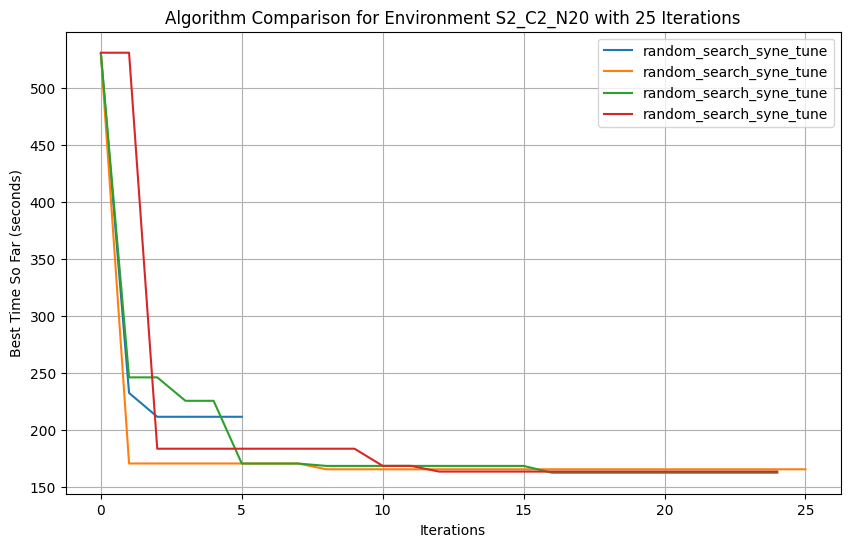

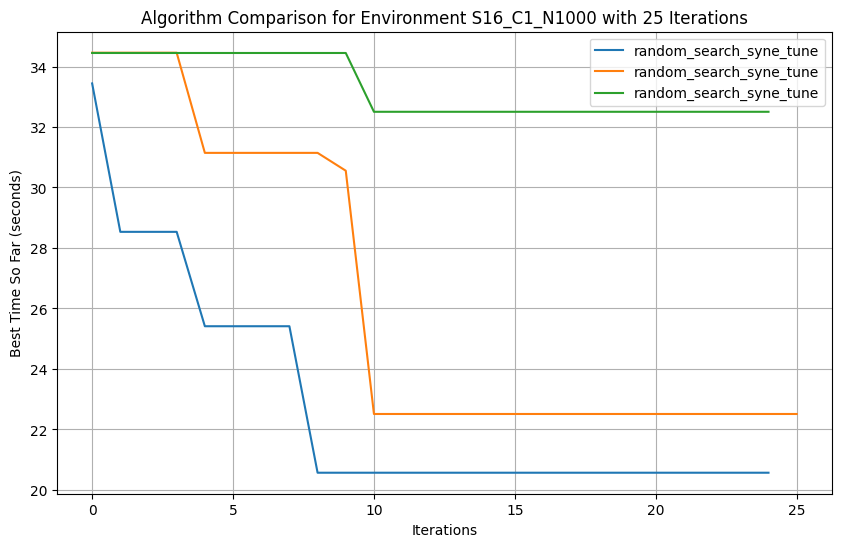

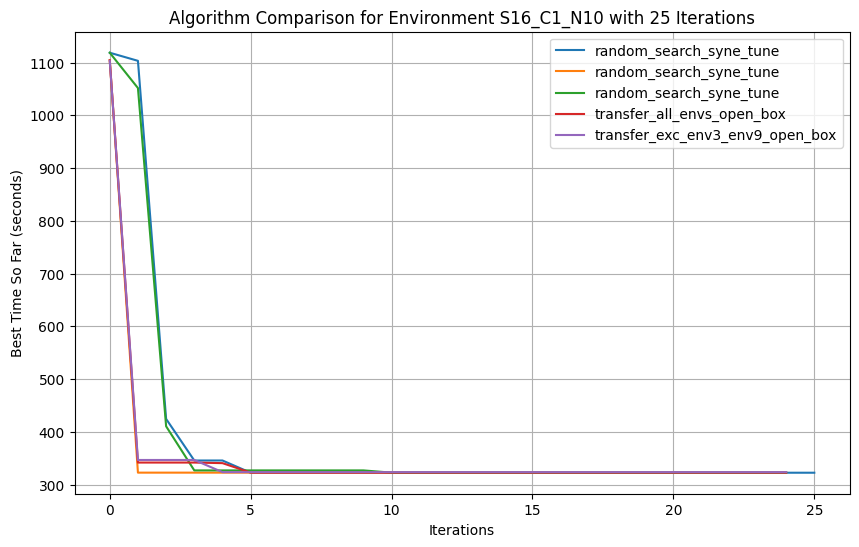

In [484]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# List of CSV file paths (use glob to load all files matching a pattern, e.g., "*.csv")
file_list_env_1 = glob.glob('C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/results/S16_C16_N1000/*/*.csv')
file_list_env_2 = glob.glob('C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/results/S16_C8_N100/*/*.csv')
file_list_env_3 = glob.glob('C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/results/S8_C1_N50/*/*.csv')
file_list_env_4 = glob.glob('C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/results/S16_C16_N10000/*/*.csv')
file_list_env_5 = glob.glob('C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/results/S16_C4_N10/*/*.csv')
file_list_env_6 = glob.glob('C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/results/S8_C8_N500/*/*.csv')
file_list_env_7 = glob.glob('C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/results/S2_C2_N20/*/*.csv')
file_list_env_8 = glob.glob('C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/results/S16_C1_N1000/*/*.csv')
file_list_env_9 = glob.glob('C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/results/S16_C1_N10/*/*.csv')



file_lists = [file_list_env_1,file_list_env_2,file_list_env_3,file_list_env_4,file_list_env_5,file_list_env_6,file_list_env_7,file_list_env_8,file_list_env_9]

for file_list in file_lists:
    plt.figure(figsize=(10, 6))

    if file_list is None:
        continue

    env = ""
    
    for file_path in file_list:

        if file_list is None:
            continue

        algo = file_path.split("\\")[-2]
        env = file_path.split("/")[-1].split("\\")[0]

        
        # Load the CSV file
        df = pd.read_csv(file_path)
    
        df = df[df['time'].notna()].head(25)
    
        # Ensure 'timestamp_end' is interpreted as a datetime object
        #df['timestamp_end'] = pd.to_datetime(df['timestamp_end'])
    
        # Calculate relative time in seconds from the start of each run
        #df['relative_time'] = (df['timestamp_end'] - df['timestamp_end'].iloc[0]).dt.total_seconds()
    
        # Calculate the "best time so far" using cumulative minimum on 'time'
        df['best_time_so_far'] = df['time'].cummin()
    
        # Extract the run name from the file name (for labeling)
        run_name = file_path.split('/')[-1].replace('.csv', '').replace('results\\', '')
    
        # Plot 'best_time_so_far' against 'relative_time'
        plt.plot(df['best_time_so_far'], label=algo)

    
    
    # Add labels and title
    plt.xlabel('Iterations')
    plt.ylabel(f'Best Time So Far (seconds)')
    
    ax = plt.gca()
    #ax.set_xlim([-50, 4000])
    #ax.set_ylim([0, 200])
    
    #ax.set_xticks(np.arange(0, 1200, 200))
    #ax.set_yticks(np.arange(0, 50, 10))
    
    plt.grid()
    plt.title(f'Algorithm Comparison for Environment {env} with 25 Iterations')
    
    #plt.legend(bbox_to_anchor =(0.5,-0.22), loc='upper left')
    plt.legend(loc='upper right')
    
    #plt.legend()
    plt.show()

